In [27]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [28]:
import numpy as np
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension=10000):  # one-hot encoding
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # sequence is a list
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_categorical(train_labels)  #46 dimension one-hot vector
one_hot_test_labels = to_categorical(test_labels)

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,))) # Hidden Layer1
model.add(layers.Dense(64, activation = 'relu')) # Hidden Layer2
model.add(layers.Dense(46, activation = 'softmax')) # Scoring, 46 classes

In [30]:
model.compile(optimizer='rmsprop',  # set optimizer
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [32]:
history = model.fit(partial_x_train,partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 56ms/step - loss: 0.5187 - accuracy: 0.1115 - val_loss: 0.1640 - val_accuracy: 0.3730
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 0.1362 - accuracy: 0.4349 - val_loss: 0.0922 - val_accuracy: 0.5310
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 0.0822 - accuracy: 0.5616 - val_loss: 0.0666 - val_accuracy: 0.6040
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.0586 - accuracy: 0.6389 - val_loss: 0.0524 - val_accuracy: 0.6490
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.0459 - accuracy: 0.6961 - val_loss: 0.0443 - val_accuracy: 0.6810
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.0377 - accuracy: 0.7343 - val_loss: 0.0396 - val_accuracy: 0.7200
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.0315 - accuracy: 0.7841 - val_loss: 0.0365 - val_accuracy: 0.7490
Epoch 8/20
16

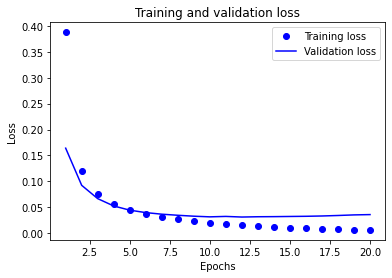

In [33]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss') # make a graph
plt.plot(epochs, val_loss, 'b', label = 'Validation loss') # make a graph
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

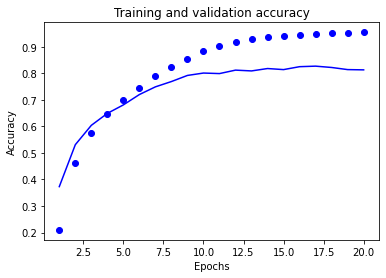

In [34]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend

plt.show()

In [35]:
results = model.evaluate(x_test,one_hot_test_labels)
results

71/71 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.7903


[0.03943439573049545, 0.7902938723564148]